In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from neupy import algorithms, layers, estimators, environment
from IPython import display

import os
import time
import math

np.random.seed(11)

num_neuro_1 = 10
num_neuro_2 = 10
num_neuro_3 = 5

RES_DIR = './results/'
DATA_DIR = './CCPP/'
HOME_DIR = './'
use_gpu = False

In [2]:
learn_data = pd.read_csv(HOME_DIR+'split_data/train_set.csv').values
print(learn_data.shape)

BATCH_SIZE = len(learn_data)
IN_SIZE = learn_data.shape[1]-1

(5622, 5)


In [3]:
from torch.utils.data import Dataset
class CCPPDataset(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    
datasets = {x: CCPPDataset(pd.read_csv(HOME_DIR+'split_data/'+x+'_set.csv').values)
                  for x in ['train', 'val', 'test']}

dataset_sizes = {x: len(datasets[x]) for x in ['train', 'val', 'test']}

--------------------------------------------

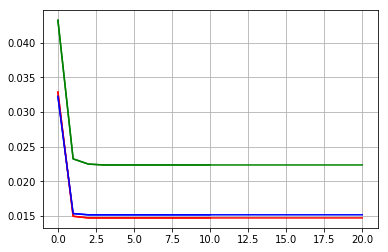

Epoch 20/29
train:  0.014705514369850355
valid:  0.015152881639547646
test:  0.02234320829268981
----------
Wall time: 30.2 s


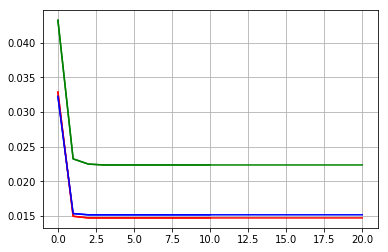

In [4]:
%%time

err_epoh = []
valid_err_epoh = []
test_err_epoh = []

num_epochs = 30

environment.reproducible()

cgnet = algorithms.gd.conjgrad.ConjugateGradient(
    connection=[layers.Input(IN_SIZE), layers.Tanh(num_neuro_1),
        layers.Tanh(num_neuro_2), layers.Tanh(num_neuro_3), layers.Tanh(1)],
    error='mse', update_function='conjugate_descent',
    addons=[algorithms.LinearSearch], verbose=False, show_epoch=10)
print('cgnet is ready!')

for epoch in range(num_epochs):
    cgnet.train(datasets['train'].data[:,:IN_SIZE], datasets['train'].data[:,IN_SIZE],
                datasets['val'].data[:,:IN_SIZE], datasets['val'].data[:,IN_SIZE], epochs=1)
    
    y_test_pred = cgnet.predict(datasets['test'].data[:,:IN_SIZE]).round(1)
    
    err_epoh.append(float(cgnet.train_errors[-1]))
    valid_err_epoh.append(cgnet.validation_errors[-1])
    test_err_epoh.append(estimators.mse(datasets['test'].data[:,IN_SIZE], y_test_pred))

    
    if (epoch%10 == 0):
        plt.grid(True)
        plt.plot(err_epoh, color='r')
        plt.plot(valid_err_epoh, color='b')
        plt.plot(test_err_epoh, color='g')
            
        display.clear_output(wait=True)
        display.display(plt.gcf())
            
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print("train: ", err_epoh[epoch-1])
        print("valid: ", valid_err_epoh[epoch-1])
        print("test: ", test_err_epoh[epoch-1])
        print('-' * 10)     

train: 0.014705514369850351
val: 0.015152881639547642
test: 0.02234320829268981


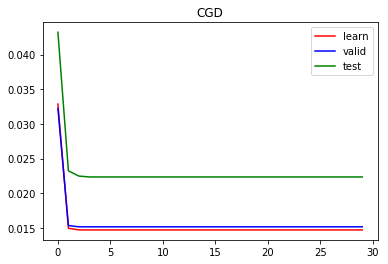

In [5]:
print('train: {}\nval: {}\ntest: {}'.format(err_epoh[-1], valid_err_epoh[-1], test_err_epoh[-1]))

fig = plt.figure()
plt.plot(err_epoh, color='r', label = 'learn')
plt.plot(valid_err_epoh, color='b', label = 'valid')
plt.plot(test_err_epoh, color='g', label = 'test')
plt.legend()
plt.title('CGD')
#plt.show()
plt.savefig(HOME_DIR+'PUNKT_4_4/CGD_train_valid_test.png', bbox_inches='tight')

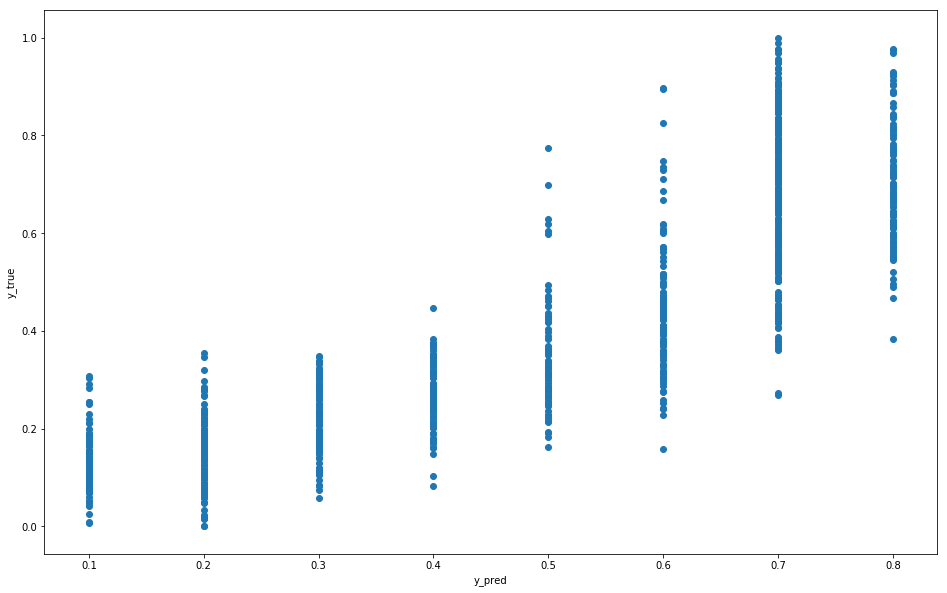

In [6]:
y_pred = cgnet.predict(datasets['test'].data[:,:IN_SIZE]).round(1)

fig = plt.figure(figsize=(16, 10))
plt.scatter(y_pred, datasets['test'].data[:,IN_SIZE])
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

---------------------------------------------------------

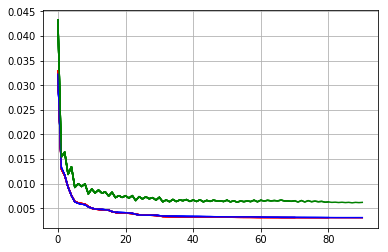

Epoch 90/129
train:  0.003039897135529224
valid:  0.003102450344848746
test:  0.006145358732241478
----------


KeyboardInterrupt: 

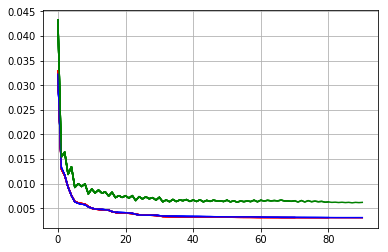

In [7]:
%%time

err_epoh = []
valid_err_epoh = []
test_err_epoh = []

num_epochs = 100

environment.reproducible()

cgnet = algorithms.gd.conjgrad.ConjugateGradient(
    connection=[layers.Input(IN_SIZE), layers.Tanh(num_neuro_1),
        layers.Tanh(num_neuro_2), layers.Tanh(num_neuro_3), layers.Tanh(1)],
    error='mse', update_function='fletcher_reeves',
    addons=[algorithms.LinearSearch], verbose=False, show_epoch=10)
print('cgnet is ready!')

for epoch in range(num_epochs):
    cgnet.train(datasets['train'].data[:,:IN_SIZE], datasets['train'].data[:,IN_SIZE],
                datasets['val'].data[:,:IN_SIZE], datasets['val'].data[:,IN_SIZE], epochs=1)
    
    y_test_pred = cgnet.predict(datasets['test'].data[:,:IN_SIZE]).round(1)
    
    err_epoh.append(float(cgnet.train_errors[-1]))
    valid_err_epoh.append(float(cgnet.validation_errors[-1]))
    test_err_epoh.append(estimators.mse(datasets['test'].data[:,IN_SIZE], y_test_pred))

    
    if (epoch%10 == 0):
        plt.grid(True)
        plt.plot(err_epoh, color='r')
        plt.plot(valid_err_epoh, color='b')
        plt.plot(test_err_epoh, color='g')
            
        display.clear_output(wait=True)
        display.display(plt.gcf())
            
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print("train: ", err_epoh[epoch-1])
        print("valid: ", valid_err_epoh[epoch-1])
        print("test: ", test_err_epoh[epoch-1])
        print('-' * 10)     

train: 0.003032501182910207
val: 0.0030881972058241884
test: 0.006091838454840605


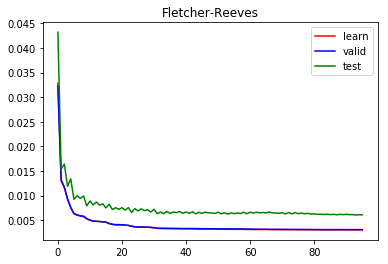

In [8]:
print('train: {}\nval: {}\ntest: {}'.format(err_epoh[-1], valid_err_epoh[-1], test_err_epoh[-1]))

fig = plt.figure()
plt.plot(err_epoh, color='r', label = 'learn')
plt.plot(valid_err_epoh, color='b', label = 'valid')
plt.plot(test_err_epoh, color='g', label = 'test')
plt.legend()
plt.title('Fletcher-Reeves')
#plt.show()
plt.savefig(HOME_DIR+'PUNKT_4_4/FR_train_valid_test.png', bbox_inches='tight')

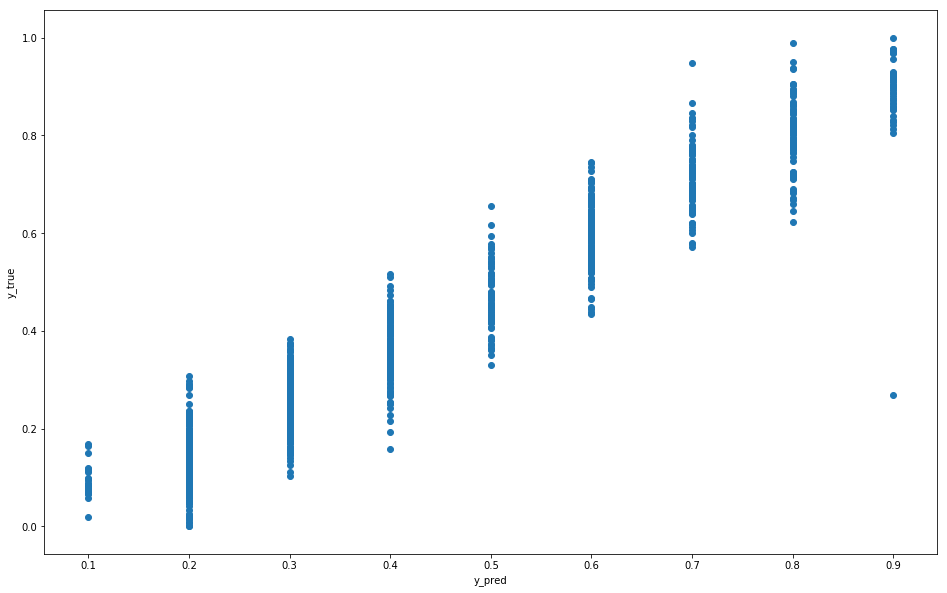

In [9]:
y_pred = cgnet.predict(datasets['test'].data[:,:IN_SIZE]).round(1)

fig = plt.figure(figsize=(16, 10))
plt.scatter(y_pred, datasets['test'].data[:,IN_SIZE])
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

---------------------

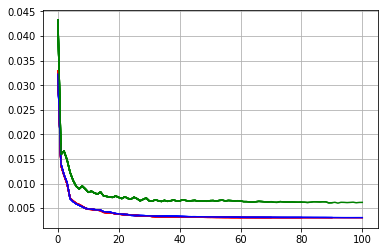

Epoch 100/149
train:  0.0030055924357788727
valid:  0.00306350837947577
test:  0.00615586135029458
----------


KeyboardInterrupt: 

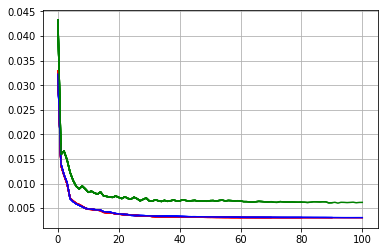

In [10]:
%%time

err_epoh = []
valid_err_epoh = []
test_err_epoh = []

num_epochs = 150

environment.reproducible()

cgnet = algorithms.gd.conjgrad.ConjugateGradient(
    connection=[layers.Input(IN_SIZE), layers.Tanh(num_neuro_1),
        layers.Tanh(num_neuro_2), layers.Tanh(num_neuro_3), layers.Tanh(1)],
    error='mse', update_function='polak_ribiere',
    addons=[algorithms.LinearSearch], verbose=False, show_epoch=10)
print('cgnet is ready!')

for epoch in range(num_epochs):
    cgnet.train(datasets['train'].data[:,:IN_SIZE], datasets['train'].data[:,IN_SIZE],
                datasets['val'].data[:,:IN_SIZE], datasets['val'].data[:,IN_SIZE], epochs=1)
    
    y_test_pred = cgnet.predict(datasets['test'].data[:,:IN_SIZE]).round(1)
    
    err_epoh.append(float(cgnet.train_errors[-1]))
    valid_err_epoh.append(float(cgnet.validation_errors[-1]))
    test_err_epoh.append(estimators.mse(datasets['test'].data[:,IN_SIZE], y_test_pred))

    
    if (epoch%10 == 0):
        plt.grid(True)
        plt.plot(err_epoh, color='r')
        plt.plot(valid_err_epoh, color='b')
        plt.plot(test_err_epoh, color='g')
            
        display.clear_output(wait=True)
        display.display(plt.gcf())
            
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print("train: ", err_epoh[epoch-1])
        print("valid: ", valid_err_epoh[epoch-1])
        print("test: ", test_err_epoh[epoch-1])
        print('-' * 10)     

train: 0.003002012776858934
val: 0.0030596366548194614
test: 0.006190042367794298


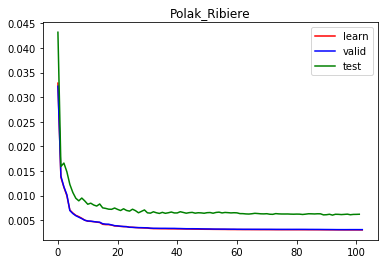

In [11]:
print('train: {}\nval: {}\ntest: {}'.format(err_epoh[-1], valid_err_epoh[-1], test_err_epoh[-1]))

fig = plt.figure()
plt.plot(err_epoh, color='r', label = 'learn')
plt.plot(valid_err_epoh, color='b', label = 'valid')
plt.plot(test_err_epoh, color='g', label = 'test')
plt.legend()
plt.title('Polak_Ribiere')
#plt.show()
plt.savefig(HOME_DIR+'PUNKT_4_4/PR_train_valid_test.png', bbox_inches='tight')

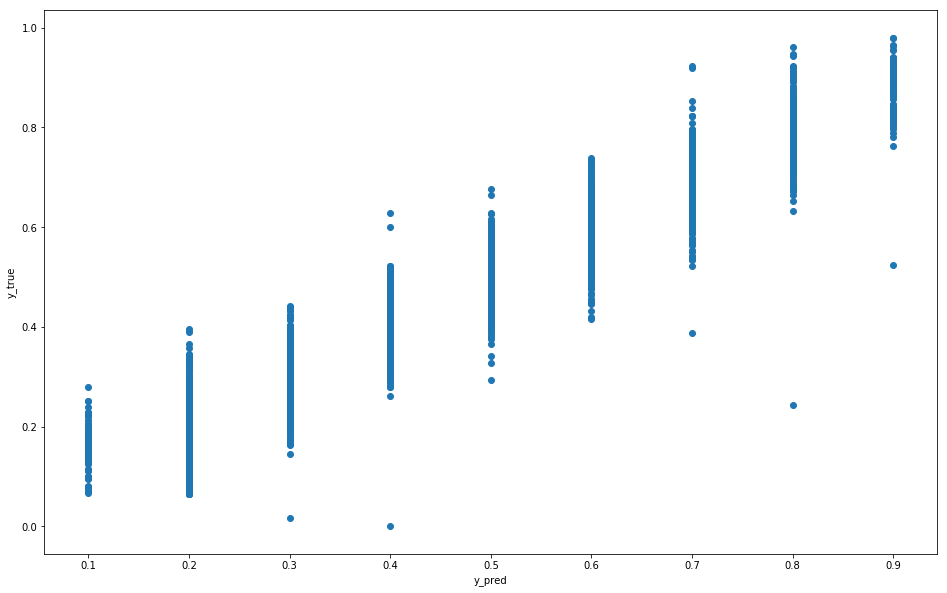

In [12]:
y_pred = cgnet.predict(datasets['val'].data[:,:IN_SIZE]).round(1)

fig = plt.figure(figsize=(16, 10))
plt.scatter(y_pred, datasets['val'].data[:,IN_SIZE])
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()